In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/content/processed_supermarket_sales.csv")

In [6]:
features = ["Unit price", "Quantity", "Tax 5%", "Total", "gross income", "Rating"]

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


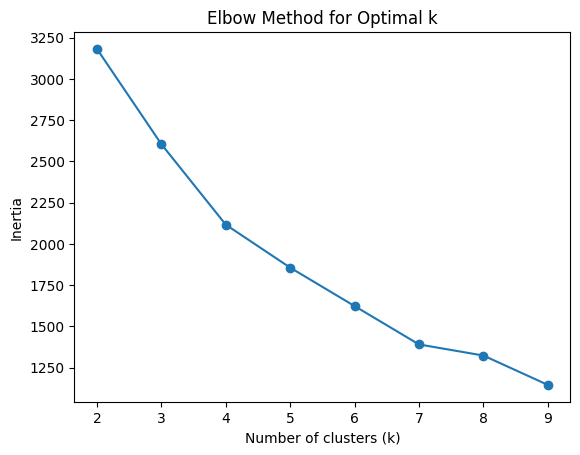

In [7]:
inertia = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


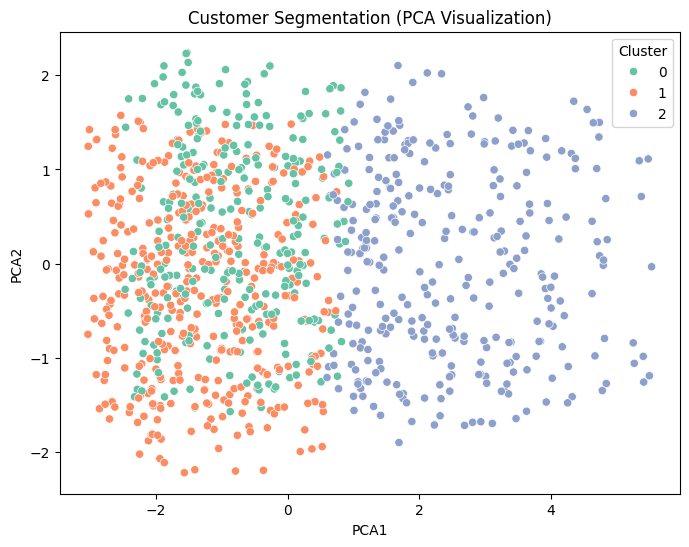

         Unit price  Quantity     Tax 5%       Total  gross income    Rating
Cluster                                                                     
0         71.792832  2.814685   9.970830  209.387439      9.970830  6.966434
1         28.646948  5.439206   7.746782  162.682414      7.746782  7.059057
2         75.867074  8.080386  30.243596  635.115526     30.243596  6.866559


In [8]:
# Fit with chosen k (say k=3 after looking at elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA (2D)
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)
df["PCA1"] = reduced[:, 0]
df["PCA2"] = reduced[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2")
plt.title("Customer Segmentation (PCA Visualization)")
plt.show()

# Look at cluster characteristics
cluster_summary = df.groupby("Cluster")[features].mean()
print(cluster_summary)

🛒 Customer Segmentation Summary

Cluster 0 – Premium Small Basket Buyers

Buy high-priced items in small quantities.

Occasional buyers, focus on quality.

🎯 Strategy: Highlight premium features, give exclusive offers.

Cluster 1 – Budget Value Seekers

Buy low-priced items in medium quantities.

Price-sensitive, but give highest satisfaction ratings.

🎯 Strategy: Push discounts, loyalty cards, bulk offers.

Cluster 2 – High-Spend Bulk Buyers

Buy premium products in bulk, highest spenders.

Slightly lower ratings → expect better service.

🎯 Strategy: VIP treatment, personalized offers, fast service.